# Data Science for Supply Chain Forecasting by Nicolas Vandeput (2nd ed.)
### Supplement by Edward Kennedy, July 2022


## Chapter 2
Define a moving average functon that returns a dataframe displaying demand, forecast, and error. Demand is a user furnished input (a Python list of observed demands) labeled d, forecast is the mean of the demand from the last n time increments, and error is the actual demand minus the forecast. The KPI's (bias, MAPE, MAE and RMS) will be calculated from this dataframe.

Input parameters are the aforementioned d, the number of periods that need to be forecast into the future (extra_periods = 1), and n the number of time increments backward that will be averaged (n = 3). Note we have given extra_periods and n default values of 1 and 3, respectively.

In [1]:
import pandas as pd
import numpy as np

In [2]:
def moving_average(d, extra_periods = 1, n = 3):
    
    # Historical period length
    cols = len(d)
    
    # Append np.nan into demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    
    # Define the forecast array.
    f = np.full(cols+extra_periods, np.nan)
    
    for t in range(n,cols):
        f[t]=np.mean(d[t-n:t])
    
    # Forecast for all extra periods
    f[t+1:] = np.mean(d[t-n+1: t+1])
    
    # Return a Dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand': d, 'Forecast':f, 'Error': d-f})
    print(df)
    
    return df

Define a function to compute absolute and relative bias.

In [3]:
def kpi_Bias(df):
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs/dem_ave

Define the sequence of demands that will be utilized for the forecast. Write them as a Python list.  The same list as used in the book is provided below.

In [4]:
d = [37, 60, 85, 112, 132, 145, 179, 198, 150, 132]

Call the moving average function using four extra time increments and setting the moving average to three time increments.

In [5]:
df = moving_average(d, extra_periods= 4, n=3)

    Demand    Forecast      Error
0     37.0         NaN        NaN
1     60.0         NaN        NaN
2     85.0         NaN        NaN
3    112.0   60.666667  51.333333
4    132.0   85.666667  46.333333
5    145.0  109.666667  35.333333
6    179.0  129.666667  49.333333
7    198.0  152.000000  46.000000
8    150.0  174.000000 -24.000000
9    132.0  175.666667 -43.666667
10     NaN  160.000000        NaN
11     NaN  160.000000        NaN
12     NaN  160.000000        NaN
13     NaN  160.000000        NaN


As expected there are no forecasts or computed errors for the first n=3 periods because the moving average would require demands prior to period 0. As a sanity check consider period 3: we have (37 + 60 +85)/3 = 60.67 which is indeed the same as the first forecasted value. The actual demand was for 112 units so the corresponding error is 112 - 60.67 = 51.33 which checks with our results.

### Plot the moving average forecast. 
Do not use ylim = 30 as done in the book because the demand and the forecast both exceed 30.

<AxesSubplot:title={'center':'Moving Average'}>

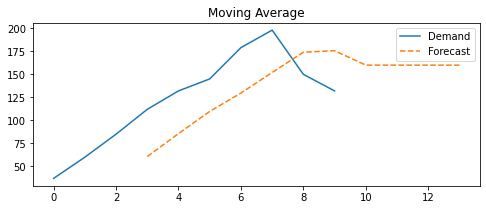

In [6]:
df[['Demand', 'Forecast']].plot(style=['-', '--'], title = 'Moving Average', figsize=(8,3))

### Calculate relative and absolute bias.
Get this from the dataframe called 'df' created above

In [7]:
def bias(df):
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs/dem_ave
    print('Absolute Bias: {:0.2f}'.format(bias_abs))
    print('Relative Bias: {:0.2%}'.format(bias_rel))

In [8]:
bias(df)

Absolute Bias: 22.95
Relative Bias: 15.33%


### Calculate MAPE

In [9]:
MAPE = (df['Error'].abs()/df['Demand']).mean()
MAPE

0.29310830322099823

### Calculate MAE

In [10]:
def mae(df):
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs/dem_ave
    print('MAE Absolute: {:.2f}'.format(MAE_abs))
    print('MAE Relative: {:.2%}'.format(MAE_rel))

In [11]:
mae(df)

MAE Absolute: 42.29
MAE Relative: 28.24%


### Calculate RMSE

In [12]:
def rmse(df):
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs/dem_ave
    print('RMSE Absolute: {:.2f}'.format(RMSE_abs))
    print('RMSE Relative: {:.2%}'.format(RMSE_rel))
    

In [13]:
rmse(df)

RMSE Absolute: 43.20
RMSE Relative: 28.85%


We can now aggregate these KPIs into a single function as the author had done.

In [14]:
def kpi(df):
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs/dem_ave
    print('Absolute Bias: {:0.2f}'.format(bias_abs))
    print('Relative Bias: {:0.2%}'.format(bias_rel))
    
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:0.2%}'.format(MAPE))
    
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs/dem_ave
    print('MAE Absolute: {:.2f}'.format(MAE_abs))
    print('MAE Relative: {:.2%}'.format(MAE_rel))
    
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs/dem_ave
    print('RMSE Absolute: {:.2f}'.format(RMSE_abs))
    print('RMSE Relative: {:.2%}'.format(RMSE_rel))
    

In [15]:
kpi(df)

Absolute Bias: 22.95
Relative Bias: 15.33%
MAPE: 29.31%
MAE Absolute: 42.29
MAE Relative: 28.24%
RMSE Absolute: 43.20
RMSE Relative: 28.85%


## Plotting the effect of variable n

Let see what effect varying the time increment has on forecast error. First well define a new demand function by appending new values to the previous array we used for d. This longer sequence will enable more accurately portray the fffect of extending the time increment n.

In [16]:
d = [37, 60, 85, 112, 132, 145, 179, 198, 150, 132, 101, 119, 100, 88, 72, 42, 80, 97, 131, 150, 168, 177, 190, 167, 154, 129 ]

The moving_average subroutine is copied below then modified to incorporate three values of n which are labeled n1, n2, and n3.  This change will result in new forecasts and forecast errors which are named in the below code corresponding to thier associated value of n.

In [17]:
def moving_average2(d, extra_periods, n1, n2, n3):
    
    # Historical period length
    cols = len(d)
    
    # Append np.nan into demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    
    # Define the forecast array for n1.
    f1 = np.full(cols+extra_periods, np.nan)
    
    for t in range(n1,cols):
        f1[t]=np.mean(d[t-n1:t])
    
    # Forecast for all extra periods
    f1[t+1:] = np.mean(d[t-n1+1: t+1])
    
      
    # Define the forecast array for n2.
    f2 = np.full(cols+extra_periods, np.nan)
    
    for t in range(n2,cols):
        f2[t]=np.mean(d[t-n2:t])
    
    # Forecast for all extra periods
    f2[t+1:] = np.mean(d[t-n2+1: t+1])
    
    
    # Define the forecast array for n3.
    f3 = np.full(cols+extra_periods, np.nan)
    
    for t in range(n3,cols):
        f3[t]=np.mean(d[t-n3:t])
    
    # Forecast for all extra periods
    f3[t+1:] = np.mean(d[t-n3+1: t+1])
    
    # Return a Dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand': d,'Forecast1':f1,'Error1':d-f1,'Forecast2':f2,'Error2':d-f2,'Forecast3':f3,'Error3': d-f3})
    print(df)
    
    return df

Call the new moving average function using one extra time increment and setting the time increments n to 1, 3, and 5, respectively.

In [20]:
df2 = moving_average2(d, extra_periods= 1, n1 = 1, n2 = 3, n3 = 5)

    Demand  Forecast1  Error1   Forecast2     Error2  Forecast3  Error3
0     37.0        NaN     NaN         NaN        NaN        NaN     NaN
1     60.0       37.0    23.0         NaN        NaN        NaN     NaN
2     85.0       60.0    25.0         NaN        NaN        NaN     NaN
3    112.0       85.0    27.0   60.666667  51.333333        NaN     NaN
4    132.0      112.0    20.0   85.666667  46.333333        NaN     NaN
5    145.0      132.0    13.0  109.666667  35.333333       85.2    59.8
6    179.0      145.0    34.0  129.666667  49.333333      106.8    72.2
7    198.0      179.0    19.0  152.000000  46.000000      130.6    67.4
8    150.0      198.0   -48.0  174.000000 -24.000000      153.2    -3.2
9    132.0      150.0   -18.0  175.666667 -43.666667      160.8   -28.8
10   101.0      132.0   -31.0  160.000000 -59.000000      160.8   -59.8
11   119.0      101.0    18.0  127.666667  -8.666667      152.0   -33.0
12   100.0      119.0   -19.0  117.333333 -17.333333      140.0 

Plot the erors corresponding to n1, n2, and n3. Note how the error plots lag the peaks and valleys of the demand curve. Shorter time increments may result in a less lag but at the expense of a higher amplitude of error.

<AxesSubplot:title={'center':'Error Comparison'}>

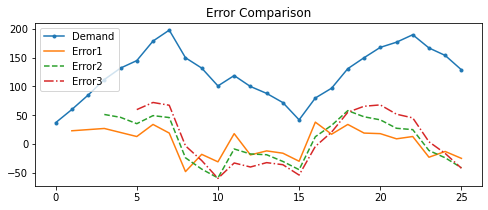

In [21]:
df2[['Demand', 'Error1', 'Error2', 'Error3']].plot(style=['.-','-', '--', '-.'], title = 'Error Comparison', figsize=(8,3))